# show reconstruct image

In [1]:
import pickle
import yaml
import os
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import torch.nn.functional as F

In [2]:
########################################################################
# load config
########################################################################
with open("./config.yaml", 'rb') as f:
    config = yaml.load(f)

/home/hiroki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  """


In [3]:
########################################################################
# Setting I/O path
########################################################################
# input dirs
INPUT_ROOT = config['IO_OPTION']['INPUT_ROOT']
dev_path = INPUT_ROOT + "/dev_data"
add_dev_path = INPUT_ROOT + "/add_dev_data"
eval_path = INPUT_ROOT + "/eval_test"
MODEL_DIR = config['IO_OPTION']['OUTPUT_ROOT'] + '/models'
# machine type
MACHINE_TYPE = config['IO_OPTION']['MACHINE_TYPE']
machine_types = os.listdir(dev_path)
# output dirs
OUTPUT_ROOT = config['IO_OPTION']['OUTPUT_ROOT']
RESULT_DIR = config['IO_OPTION']['OUTPUT_ROOT'] + '/result'
RECONS_OUTDIR = OUTPUT_ROOT +'/eval_reconstruct_img'
PKL_DIR = OUTPUT_ROOT +'/pkl'
os.makedirs(MODEL_DIR, exist_ok=True)

In [4]:
with open('{}/{}_history.pkl'.format(PKL_DIR, 'valve'), 'rb') as file:
    history = pickle.load(file)

In [5]:
history['reconstruct_img']['input'][0].shape

torch.Size([1, 128, 128])

In [6]:
epoch_num = 6 # * 10

In [11]:
input_img = history['reconstruct_img']['input'][epoch_num][0,:,:].to('cpu')
output_img = history['reconstruct_img']['output'][epoch_num][0,:,:].to('cpu')

In [12]:
input_img.shape

torch.Size([128, 128])

In [13]:
np.array(F.mse_loss(output_img, input_img))

array(13.06462, dtype=float32)

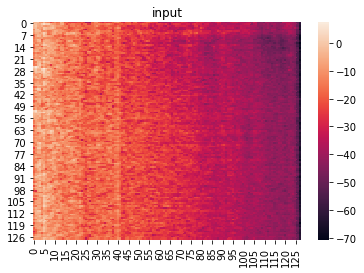

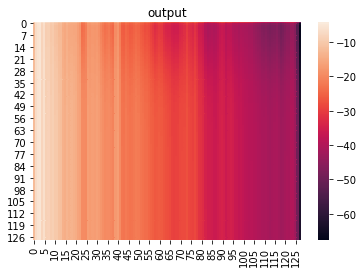

In [14]:
sns.heatmap(input_img)
plt.title('input')
plt.show()
sns.heatmap(output_img)
plt.title('output')
plt.show()

# eval

## import library

In [16]:
########################################################################
# import default python-library
########################################################################
import os
import glob
import csv
import re
import itertools
import sys
from collections import defaultdict
########################################################################


########################################################################
# import additional python-library
########################################################################
import numpy
from sklearn import metrics
import common as com
import pytorch_modeler as modeler
from pytorch_model import LSTM_AutoEncoder as Model
import torch.utils.data
import yaml
yaml.warnings({'YAMLLoadWarning': False})
import matplotlib.pyplot as plt
import seaborn as sns
########################################################################
import eval_functions as eval_func

/home/hiroki/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Setting

In [17]:
########################################################################
# load config
########################################################################
with open("./config.yaml", 'rb') as f:
    config = yaml.load(f)

In [18]:
########################################################################
# Setting seed
########################################################################
modeler.set_seed(42)

In [19]:
########################################################################
# Setting I/O path
########################################################################
# input dirs
INPUT_ROOT = config['IO_OPTION']['INPUT_ROOT']
dev_path = INPUT_ROOT + "/dev_data"
add_dev_path = INPUT_ROOT + "/add_dev_data"
eval_path = INPUT_ROOT + "/eval_test"
MODEL_DIR = config['IO_OPTION']['OUTPUT_ROOT'] + '/models'
# machine type
MACHINE_TYPE = config['IO_OPTION']['MACHINE_TYPE']
machine_types = os.listdir(dev_path)
# output dirs
OUTPUT_ROOT = config['IO_OPTION']['OUTPUT_ROOT']
RESULT_DIR = config['IO_OPTION']['OUTPUT_ROOT'] + '/result'
RECONS_OUTDIR = OUTPUT_ROOT +'/eval_reconstruct_img'
os.makedirs(MODEL_DIR, exist_ok=True)

In [20]:
########################################################################
# for original function
########################################################################
param = {}
param["dev_directory"] = dev_path
param["eval_directory"] = eval_path
param["model_directory"] = MODEL_DIR
param["result_directory"] = RESULT_DIR
param["result_file"] = 'result.csv'

## run eval

In [21]:
def make_reconstruct_img(x, y, label, file_name):
    fig = plt.figure(figsize=(10,5)) # width, height
    fig.suptitle('label={}'.format(int(label)))
    ax1 = fig.add_subplot(121, title='x') # 明示的にAxesを作成する
    sns.heatmap(x, ax=ax1) # ax1を参照するようにする
    ax2 = fig.add_subplot(122, title='y')
    sns.heatmap(y, ax=ax2)
    fig.savefig('{}.png'.format(file_name))

In [22]:
mode = 'dev'

2020-11-01 11:07:42,946 - INFO - load_directory <- development
2020-11-01 11:07:42,948 - INFO - ===========================
2020-11-01 11:07:42,949 - INFO - [1/6] /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/ToyCar
2020-11-01 11:07:42,950 - INFO - ============== MODEL LOAD ==============
2020-11-01 11:07:43,285 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/ToyCar_id_01
2020-11-01 11:07:43,293 - INFO - test_file  num : 601
2020-11-01 11:07:43,294 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-11-01 11:07:48,600 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/LSTM_AE/result/anomaly_score_ToyCar_id_01.csv
2020-11-01 11:07:48,603 - INFO - AUC : 0.6082982356289129
2020-11-01 11:07:48,604 - INFO - pAUC : 0.5319174430099152
2020-11-01 11:07:48,604 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-11-01 11:07:48,605 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/ToyCar_id_02
2020-11-01 11:07:48,614 - INFO - test_file  num : 602
2020-11-01 11:07:48,615 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-11-01 11:07:54,000 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/LSTM_AE/result/anomaly_score_ToyCar_id_02.csv
2020-11-01 11:07:54,003 - INFO - AUC : 0.6583560090702948
2020-11-01 11:07:54,004 - INFO - pAUC : 0.5489318534431317
2020-11-01 11:07:54,004 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-11-01 11:07:54,005 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/ToyCar_id_03
2020-11-01 11:07:54,014 - INFO - test_file  num : 602
2020-11-01 11:07:54,015 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-11-01 11:07:59,236 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/LSTM_AE/result/anomaly_score_ToyCar_id_03.csv
2020-11-01 11:07:59,239 - INFO - AUC : 0.536904761904762
2020-11-01 11:07:59,240 - INFO - pAUC : 0.5182002625611648
2020-11-01 11:07:59,240 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-11-01 11:07:59,241 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/ToyCar_id_04
2020-11-01 11:07:59,250 - INFO - test_file  num : 602
2020-11-01 11:07:59,251 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-11-01 11:08:04,717 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/LSTM_AE/result/anomaly_score_ToyCar_id_04.csv
2020-11-01 11:08:04,720 - INFO - AUC : 0.6408049886621314
2020-11-01 11:08:04,721 - INFO - pAUC : 0.5600907029478458
2020-11-01 11:08:04,721 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-11-01 11:08:04,722 - INFO - ===========================
2020-11-01 11:08:04,723 - INFO - [2/6] /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/ToyConveyor
2020-11-01 11:08:04,724 - INFO - ============== MODEL LOAD ==============
2020-11-01 11:08:05,105 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/ToyConveyor_id_01
2020-11-01 11:08:05,121 - INFO - test_file  num : 1181
2020-11-01 11:08:05,122 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-11-01 11:08:13,281 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/LSTM_AE/result/anomaly_score_ToyConveyor_id_01.csv
2020-11-01 11:08:13,284 - INFO - AUC : 0.4274442257217848
2020-11-01 11:08:13,285 - INFO - pAUC : 0.4848908689045448
2020-11-01 11:08:13,285 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-11-01 11:08:13,286 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/ToyConveyor_id_02
2020-11-01 11:08:13,298 - INFO - test_file  num : 1136
2020-11-01 11:08:13,299 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============
/home/hiroki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


2020-11-01 11:08:21,412 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/LSTM_AE/result/anomaly_score_ToyConveyor_id_02.csv
2020-11-01 11:08:21,415 - INFO - AUC : 0.5085639880952381
2020-11-01 11:08:21,416 - INFO - pAUC : 0.5015076754385965
2020-11-01 11:08:21,416 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-11-01 11:08:21,417 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/ToyConveyor_id_03
2020-11-01 11:08:21,431 - INFO - test_file  num : 1135
2020-11-01 11:08:21,432 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-11-01 11:08:29,763 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/LSTM_AE/result/anomaly_score_ToyConveyor_id_03.csv
2020-11-01 11:08:29,767 - INFO - AUC : 0.5552588056499196
2020-11-01 11:08:29,767 - INFO - pAUC : 0.5146345212217026
2020-11-01 11:08:29,768 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-11-01 11:08:29,769 - INFO - ===========================
2020-11-01 11:08:29,770 - INFO - [3/6] /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/fan
2020-11-01 11:08:29,770 - INFO - ============== MODEL LOAD ==============
2020-11-01 11:08:30,114 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/fan_id_00
2020-11-01 11:08:30,124 - INFO - test_file  num : 489
2020-11-01 11:08:30,125 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-11-01 11:08:35,076 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/LSTM_AE/result/anomaly_score_fan_id_00.csv
2020-11-01 11:08:35,079 - INFO - AUC : 0.4644730077120822
2020-11-01 11:08:35,080 - INFO - pAUC : 0.49600865918008386
2020-11-01 11:08:35,080 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-11-01 11:08:35,081 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/fan_id_02
2020-11-01 11:08:35,088 - INFO - test_file  num : 441
2020-11-01 11:08:35,089 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-11-01 11:08:39,486 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/LSTM_AE/result/anomaly_score_fan_id_02.csv
2020-11-01 11:08:39,490 - INFO - AUC : 0.6121114369501467
2020-11-01 11:08:39,490 - INFO - pAUC : 0.5673715079487576
2020-11-01 11:08:39,491 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-11-01 11:08:39,492 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/fan_id_04
2020-11-01 11:08:39,498 - INFO - test_file  num : 430
2020-11-01 11:08:39,499 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-11-01 11:08:43,898 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/LSTM_AE/result/anomaly_score_fan_id_04.csv
2020-11-01 11:08:43,901 - INFO - AUC : 0.4250454545454545
2020-11-01 11:08:43,902 - INFO - pAUC : 0.49696969696969695
2020-11-01 11:08:43,903 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-11-01 11:08:43,903 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/fan_id_06
2020-11-01 11:08:43,912 - INFO - test_file  num : 443
2020-11-01 11:08:43,913 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-11-01 11:08:48,318 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/LSTM_AE/result/anomaly_score_fan_id_06.csv
2020-11-01 11:08:48,321 - INFO - AUC : 0.5391545189504373
2020-11-01 11:08:48,322 - INFO - pAUC : 0.518796992481203
2020-11-01 11:08:48,322 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-11-01 11:08:48,323 - INFO - ===========================
2020-11-01 11:08:48,323 - INFO - [4/6] /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/pump
2020-11-01 11:08:48,324 - INFO - ============== MODEL LOAD ==============
2020-11-01 11:08:48,677 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/pump_id_00
2020-11-01 11:08:48,681 - INFO - test_file  num : 237
2020-11-01 11:08:48,682 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-11-01 11:08:52,207 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/LSTM_AE/result/anomaly_score_pump_id_00.csv
2020-11-01 11:08:52,209 - INFO - AUC : 0.79
2020-11-01 11:08:52,210 - INFO - pAUC : 0.5605071071840184
2020-11-01 11:08:52,210 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-11-01 11:08:52,211 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/pump_id_02
2020-11-01 11:08:52,214 - INFO - test_file  num : 205
2020-11-01 11:08:52,215 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-11-01 11:08:55,361 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/LSTM_AE/result/anomaly_score_pump_id_02.csv
2020-11-01 11:08:55,364 - INFO - AUC : 0.6675238095238096
2020-11-01 11:08:55,364 - INFO - pAUC : 0.6135338345864662
2020-11-01 11:08:55,365 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-11-01 11:08:55,365 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/pump_id_04
2020-11-01 11:08:55,370 - INFO - test_file  num : 194
2020-11-01 11:08:55,370 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-11-01 11:08:58,402 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/LSTM_AE/result/anomaly_score_pump_id_04.csv
2020-11-01 11:08:58,405 - INFO - AUC : 0.5462765957446809
2020-11-01 11:08:58,406 - INFO - pAUC : 0.5251959686450168
2020-11-01 11:08:58,407 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-11-01 11:08:58,407 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/pump_id_06
2020-11-01 11:08:58,413 - INFO - test_file  num : 196
2020-11-01 11:08:58,414 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-11-01 11:09:02,131 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/LSTM_AE/result/anomaly_score_pump_id_06.csv
2020-11-01 11:09:02,134 - INFO - AUC : 0.5130208333333333
2020-11-01 11:09:02,135 - INFO - pAUC : 0.4901315789473684
2020-11-01 11:09:02,135 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-11-01 11:09:02,136 - INFO - ===========================
2020-11-01 11:09:02,136 - INFO - [5/6] /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/slider
2020-11-01 11:09:02,137 - INFO - ============== MODEL LOAD ==============
2020-11-01 11:09:02,528 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/slider_id_00
2020-11-01 11:09:02,537 - INFO - test_file  num : 445
2020-11-01 11:09:02,538 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-11-01 11:09:06,997 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/LSTM_AE/result/anomaly_score_slider_id_00.csv
2020-11-01 11:09:06,999 - INFO - AUC : 0.8566666666666667
2020-11-01 11:09:07,000 - INFO - pAUC : 0.5063310450038139
2020-11-01 11:09:07,001 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-11-01 11:09:07,001 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/slider_id_02
2020-11-01 11:09:07,008 - INFO - test_file  num : 356
2020-11-01 11:09:07,009 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-11-01 11:09:11,115 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/LSTM_AE/result/anomaly_score_slider_id_02.csv
2020-11-01 11:09:11,118 - INFO - AUC : 0.65578125
2020-11-01 11:09:11,119 - INFO - pAUC : 0.5008223684210527
2020-11-01 11:09:11,119 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-11-01 11:09:11,120 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/slider_id_04
2020-11-01 11:09:11,126 - INFO - test_file  num : 267
2020-11-01 11:09:11,127 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-11-01 11:09:14,806 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/LSTM_AE/result/anomaly_score_slider_id_04.csv
2020-11-01 11:09:14,809 - INFO - AUC : 0.5597005988023951
2020-11-01 11:09:14,810 - INFO - pAUC : 0.5212732429877088
2020-11-01 11:09:14,810 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-11-01 11:09:14,811 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/slider_id_06
2020-11-01 11:09:14,816 - INFO - test_file  num : 178
2020-11-01 11:09:14,817 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-11-01 11:09:17,782 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/LSTM_AE/result/anomaly_score_slider_id_06.csv
2020-11-01 11:09:17,786 - INFO - AUC : 0.43205128205128207
2020-11-01 11:09:17,787 - INFO - pAUC : 0.4844804318488529
2020-11-01 11:09:17,787 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-11-01 11:09:17,788 - INFO - ===========================
2020-11-01 11:09:17,788 - INFO - [6/6] /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/valve
2020-11-01 11:09:17,789 - INFO - ============== MODEL LOAD ==============
2020-11-01 11:09:18,108 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/valve_id_00
2020-11-01 11:09:18,112 - INFO - test_file  num : 213
2020-11-01 11:09:18,113 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-11-01 11:09:21,709 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/LSTM_AE/result/anomaly_score_valve_id_00.csv
2020-11-01 11:09:21,713 - INFO - AUC : 0.3927433628318584
2020-11-01 11:09:21,713 - INFO - pAUC : 0.4988355845365626
2020-11-01 11:09:21,714 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-11-01 11:09:21,714 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/valve_id_02
2020-11-01 11:09:21,719 - INFO - test_file  num : 214
2020-11-01 11:09:21,720 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-11-01 11:09:24,801 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/LSTM_AE/result/anomaly_score_valve_id_02.csv
2020-11-01 11:09:24,804 - INFO - AUC : 0.5591228070175438
2020-11-01 11:09:24,805 - INFO - pAUC : 0.4981532779316713
2020-11-01 11:09:24,805 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-11-01 11:09:24,806 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/valve_id_04
2020-11-01 11:09:24,811 - INFO - test_file  num : 214
2020-11-01 11:09:24,812 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-11-01 11:09:27,976 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/LSTM_AE/result/anomaly_score_valve_id_04.csv
2020-11-01 11:09:27,980 - INFO - AUC : 0.5422807017543859
2020-11-01 11:09:27,980 - INFO - pAUC : 0.5046168051708217
2020-11-01 11:09:27,981 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-11-01 11:09:27,982 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/valve_id_06
2020-11-01 11:09:27,985 - INFO - test_file  num : 214
2020-11-01 11:09:27,986 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-11-01 11:09:31,179 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/LSTM_AE/result/anomaly_score_valve_id_06.csv
2020-11-01 11:09:31,181 - INFO - AUC : 0.42587719298245613
2020-11-01 11:09:31,182 - INFO - pAUC : 0.5
2020-11-01 11:09:31,182 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-11-01 11:09:31,183 - INFO - AUC and pAUC results -> /media/hiroki/working/research/dcase2020/result/2D/LSTM_AE/result/result.csv


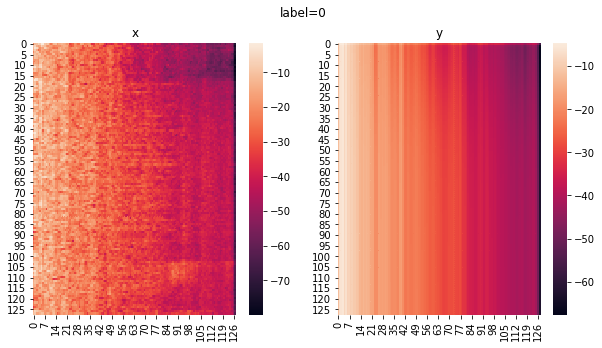

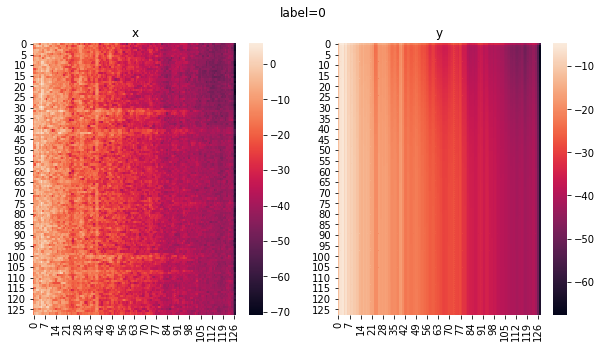

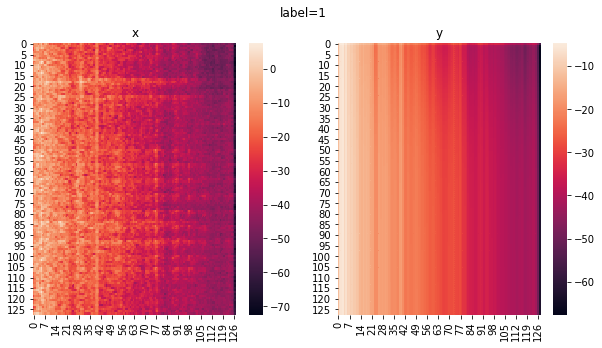

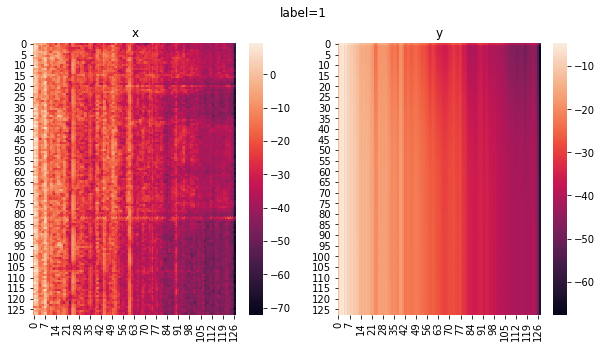

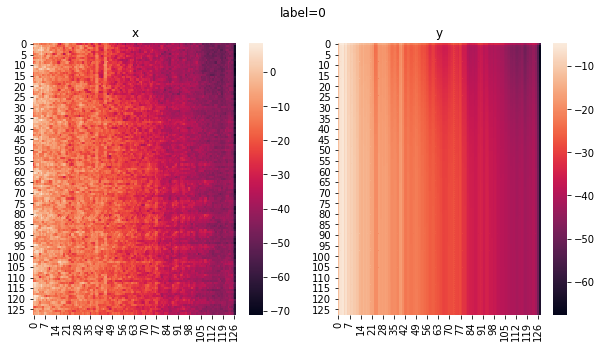

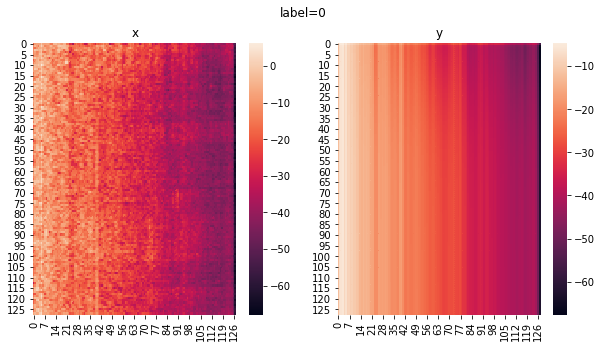

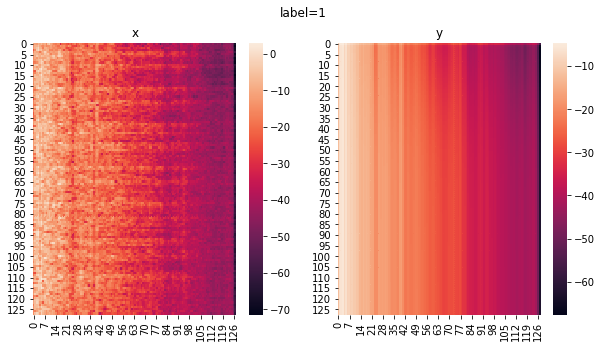

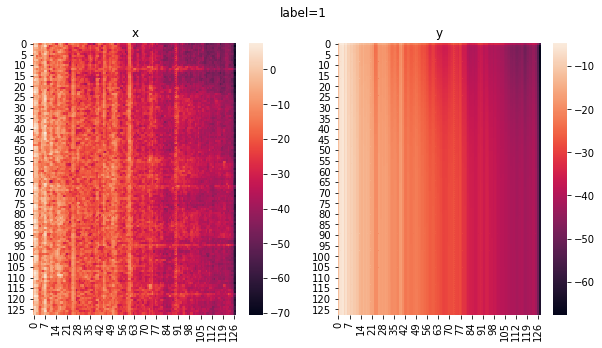

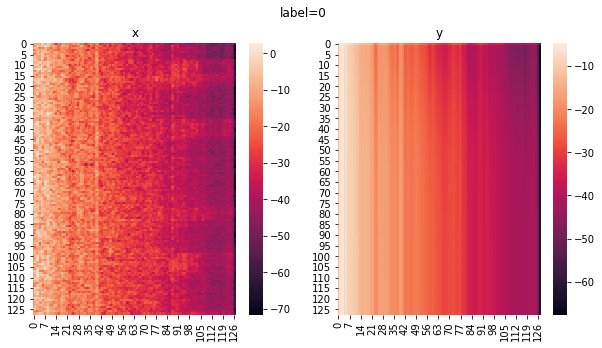

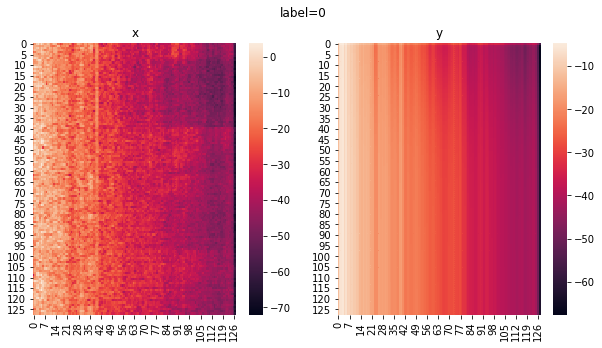

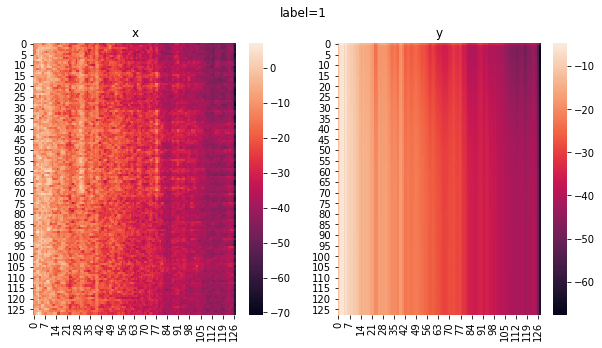

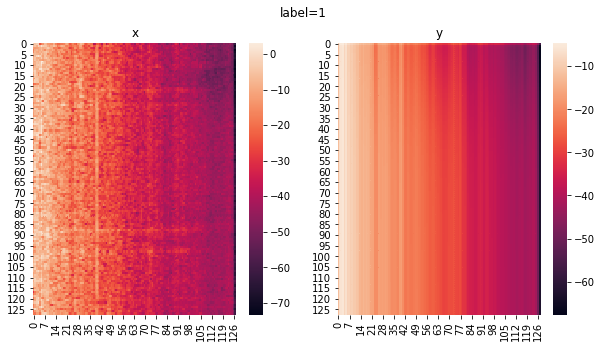

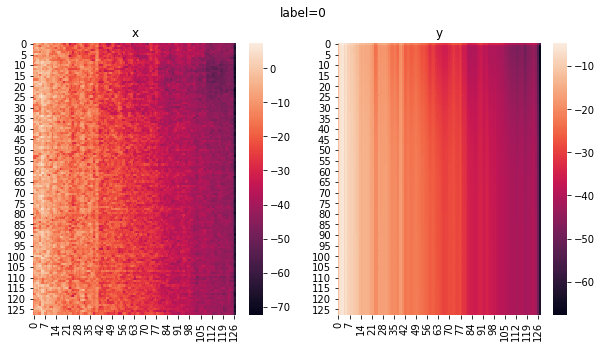

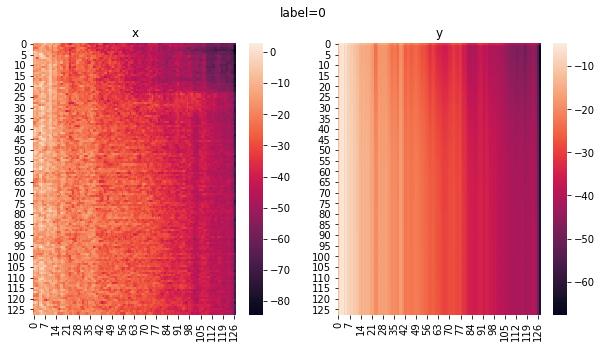

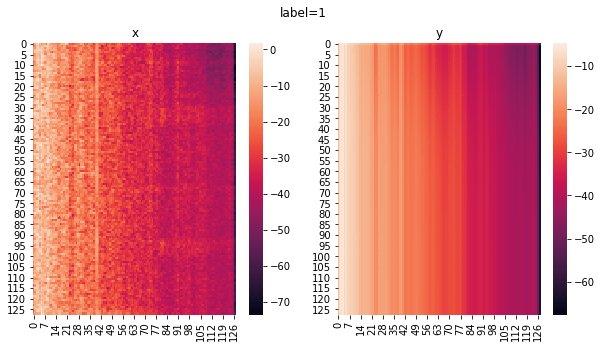

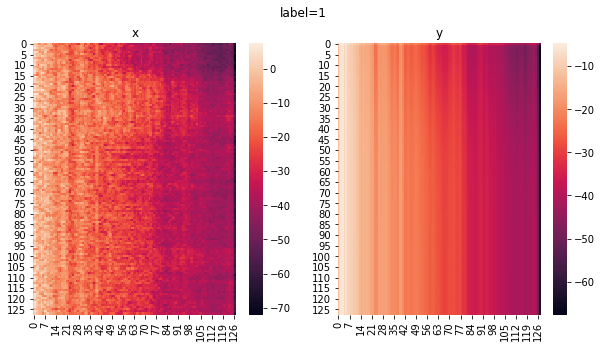

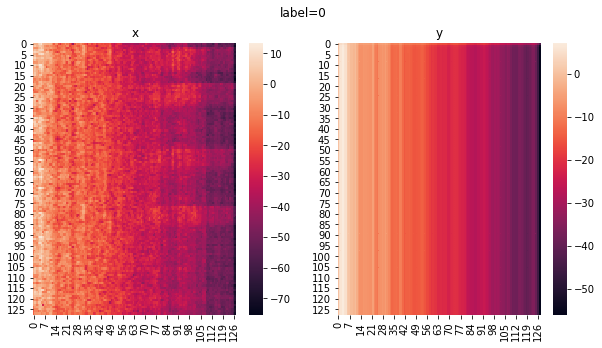

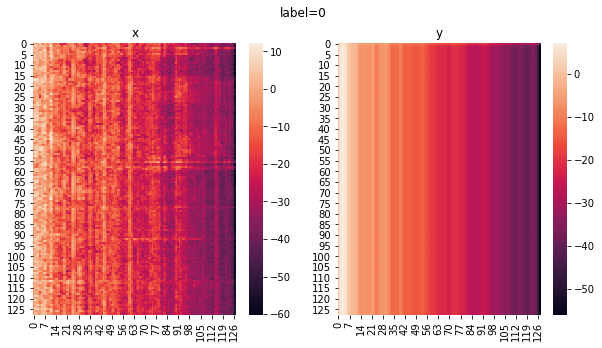

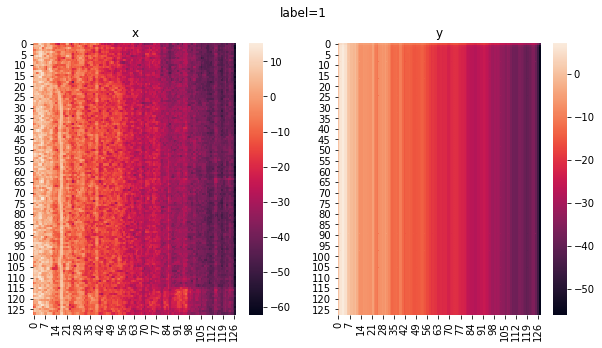

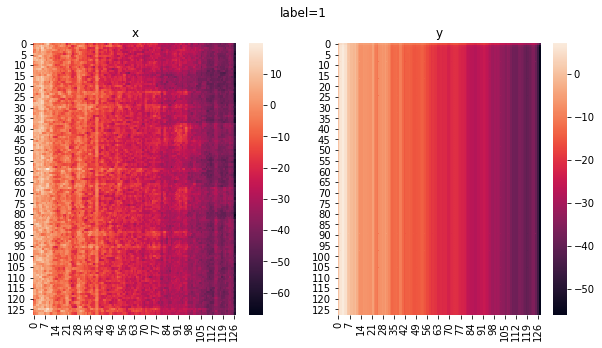

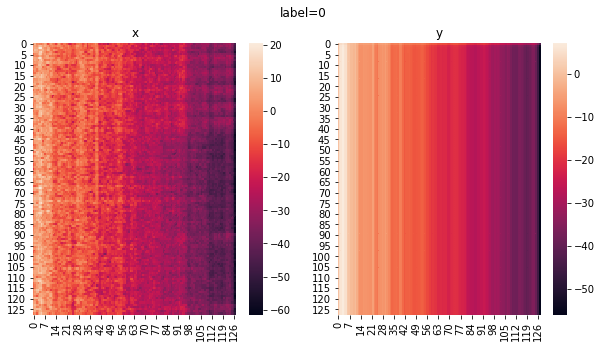

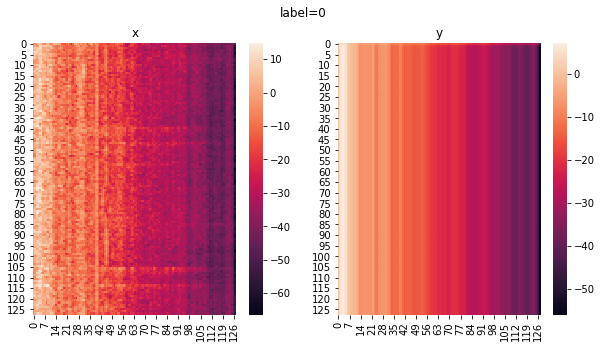

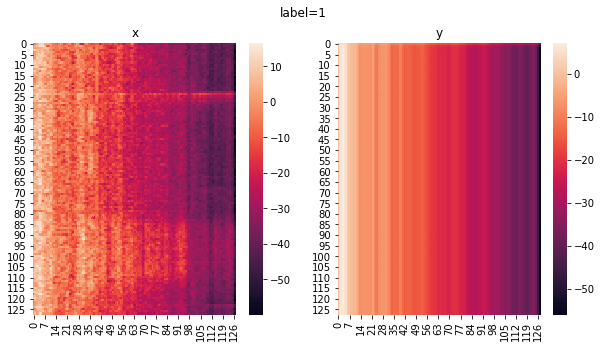

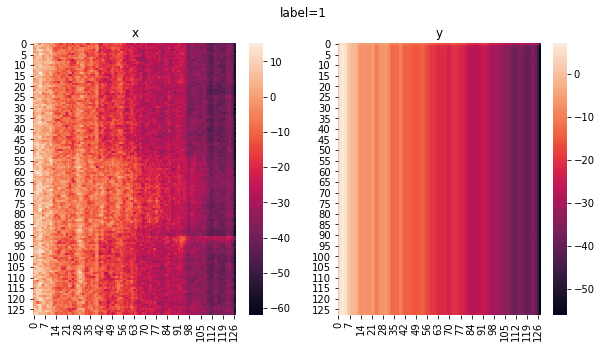

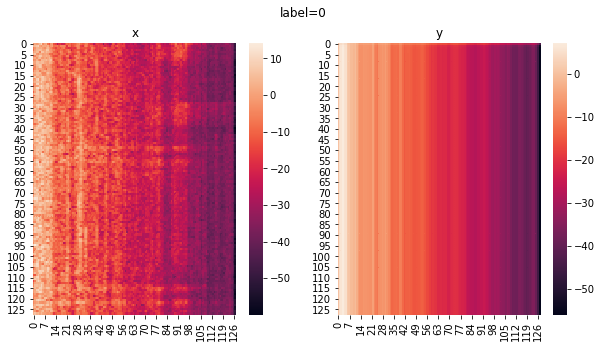

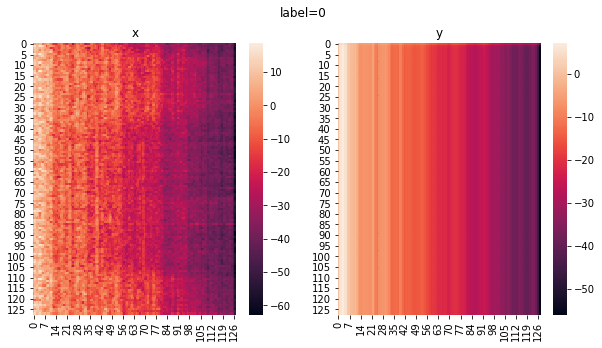

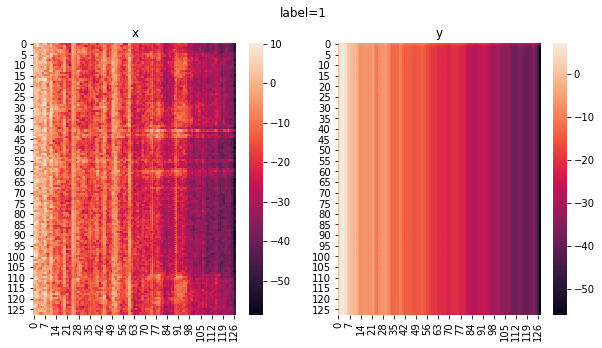

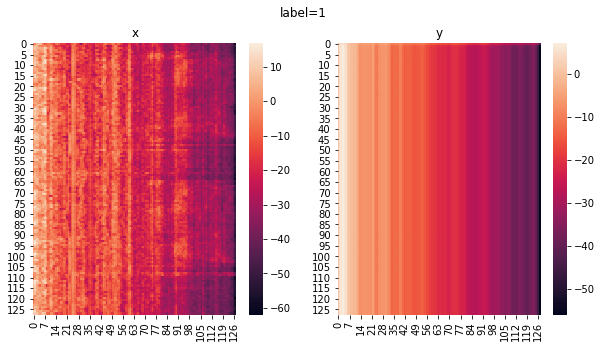

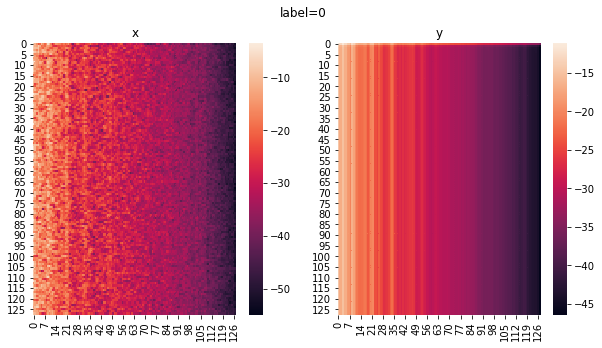

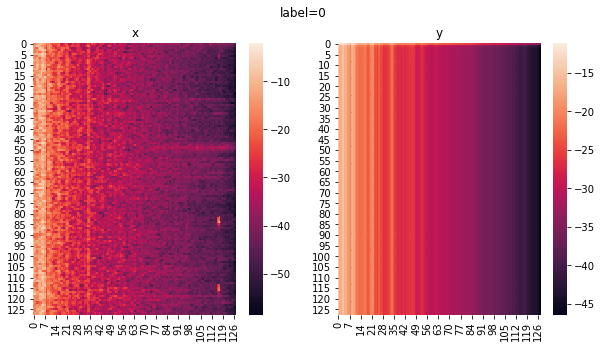

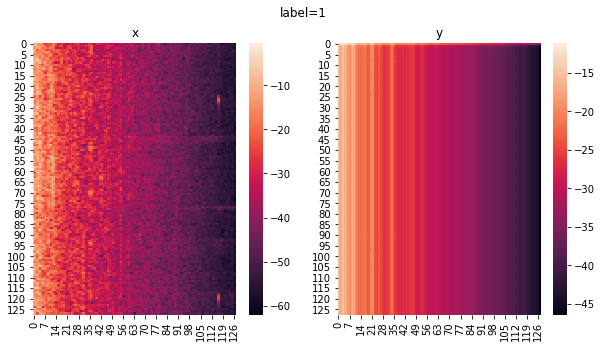

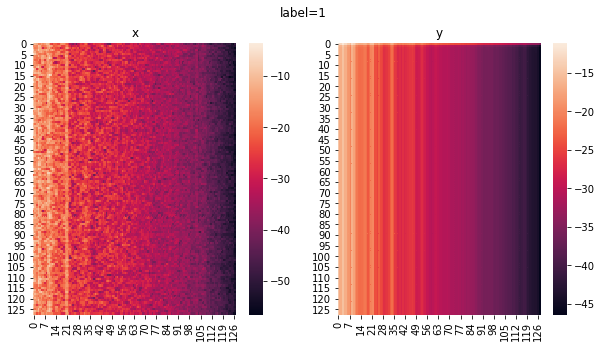

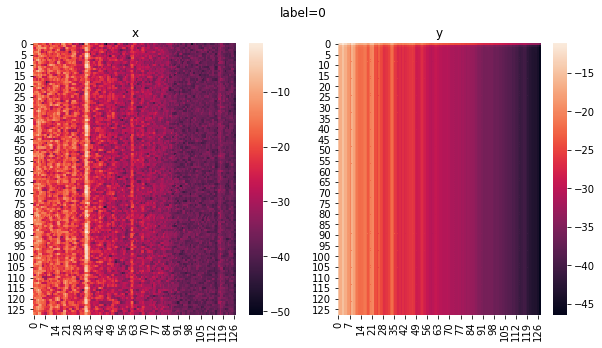

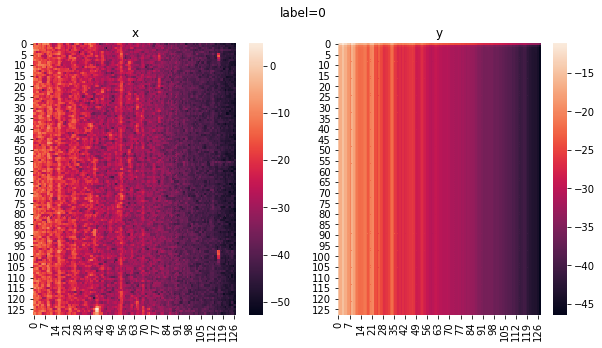

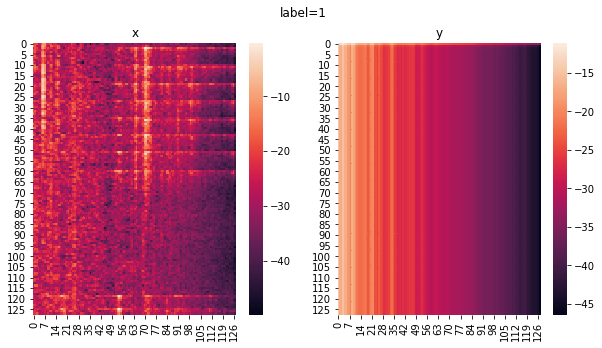

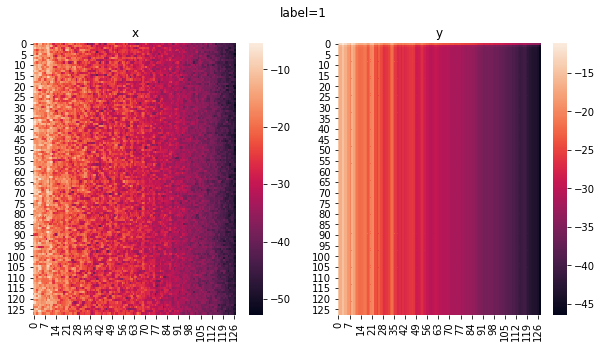

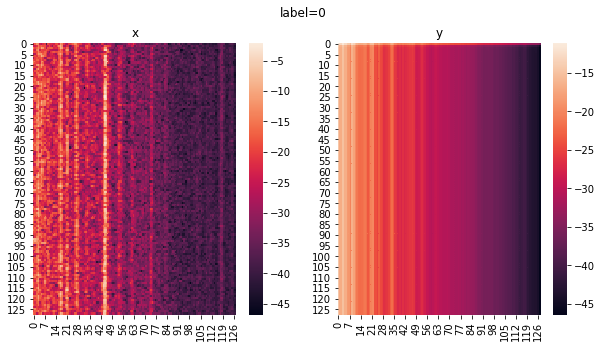

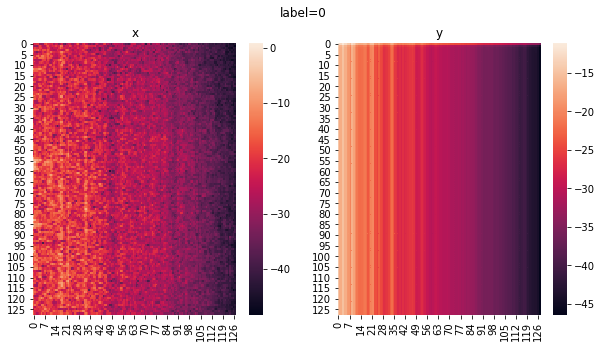

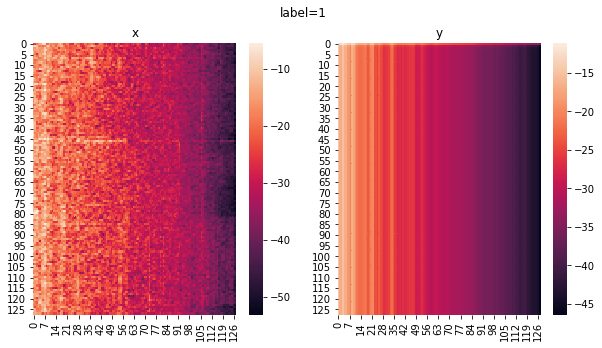

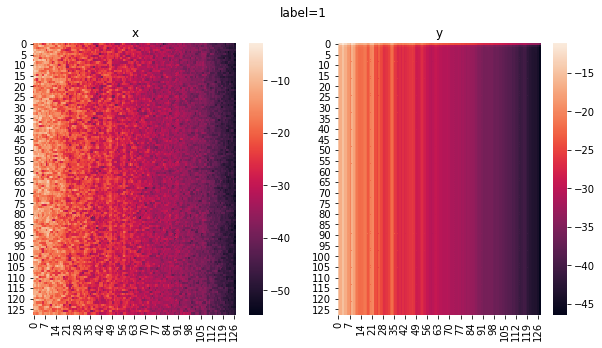

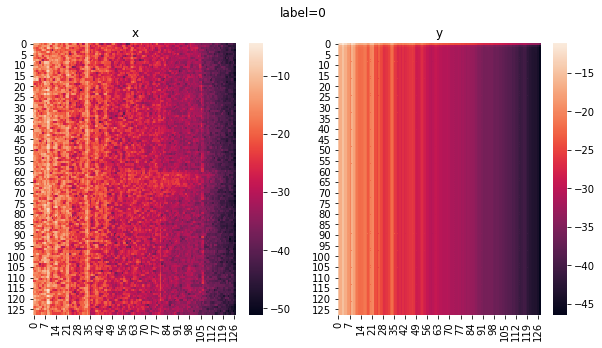

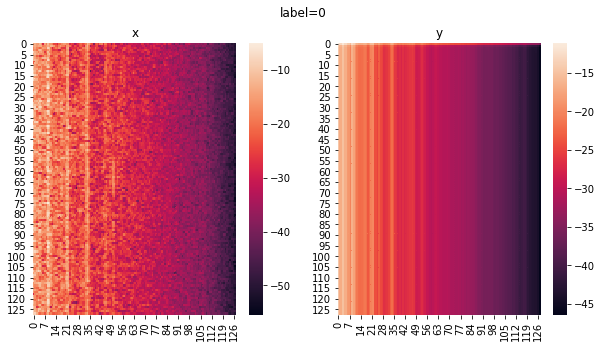

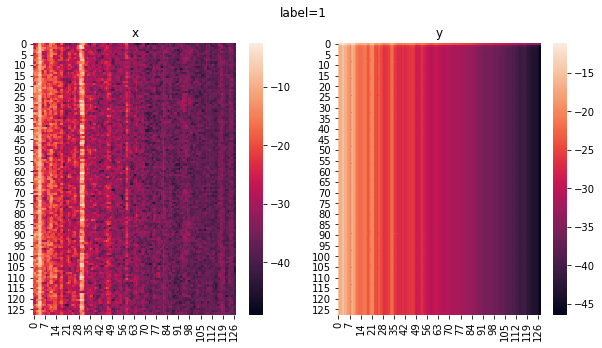

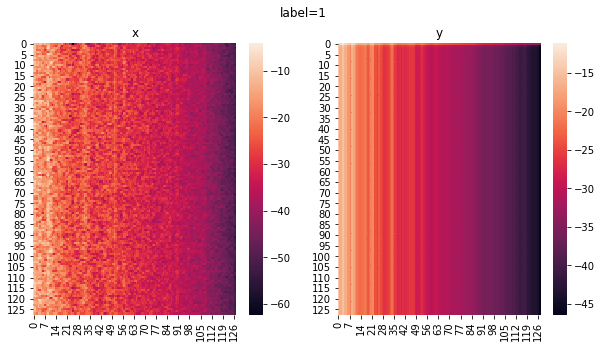

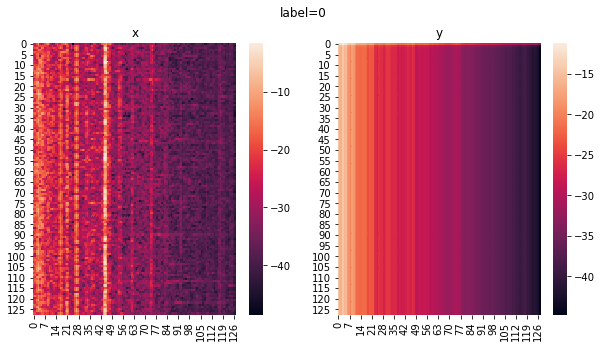

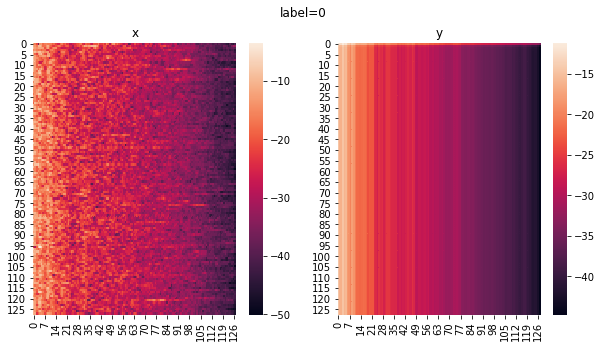

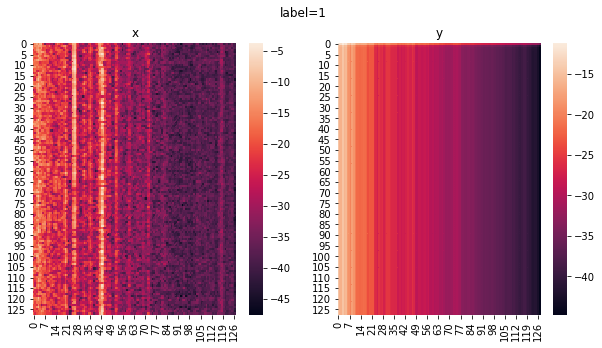

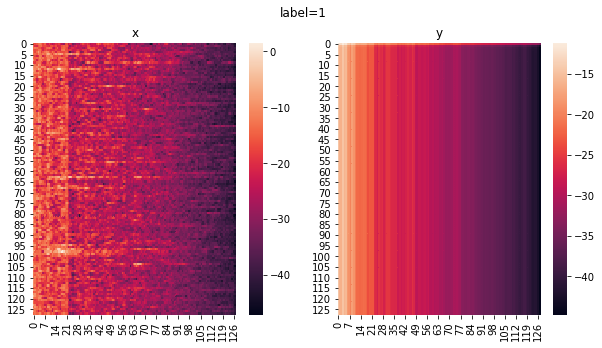

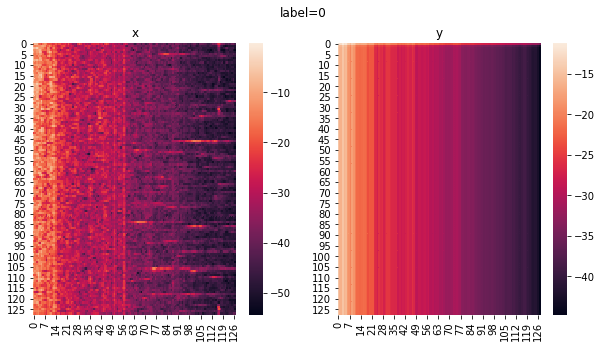

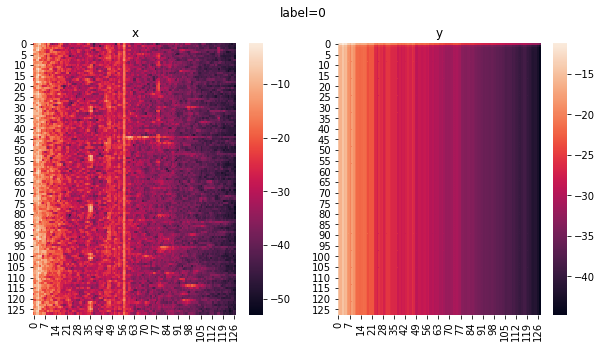

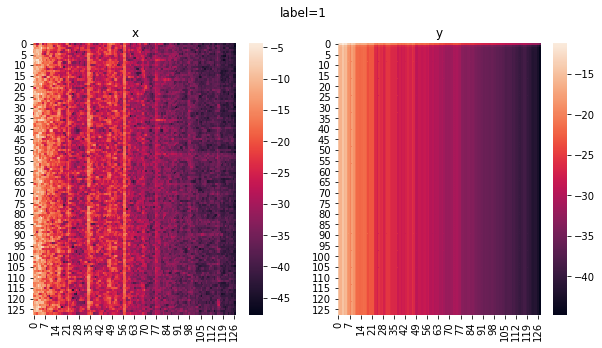

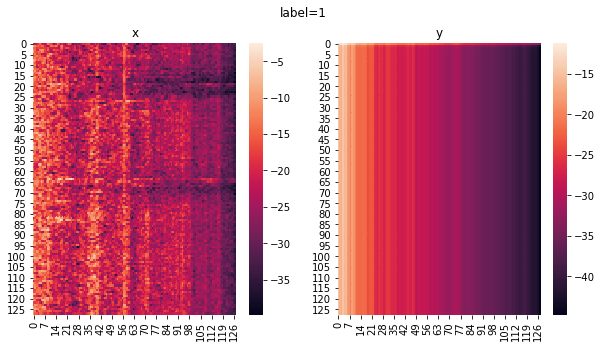

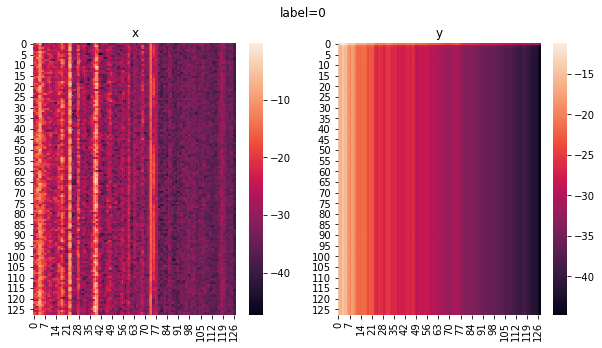

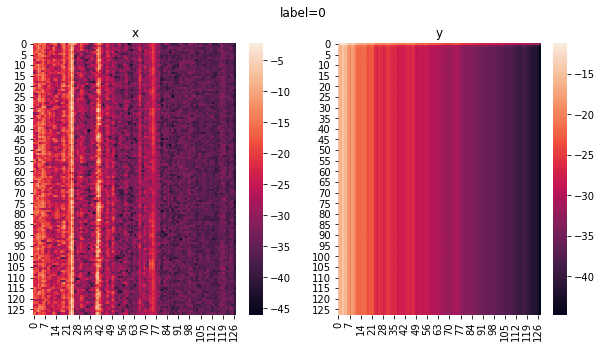

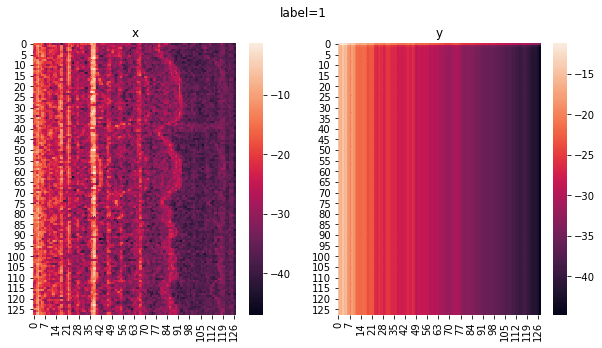

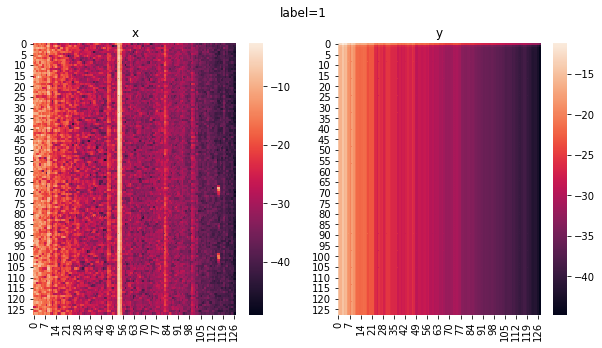

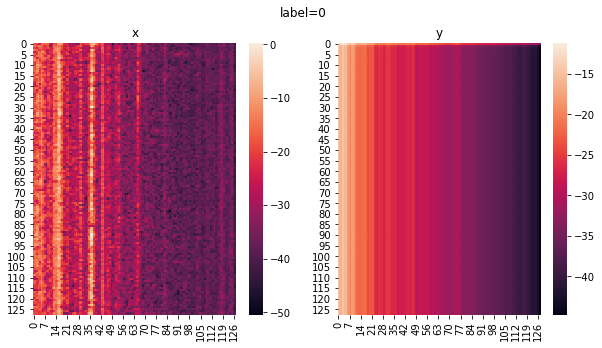

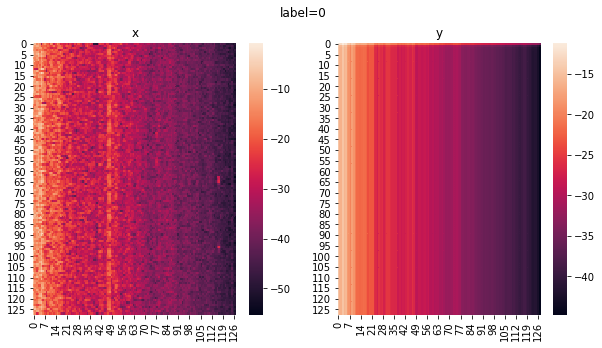

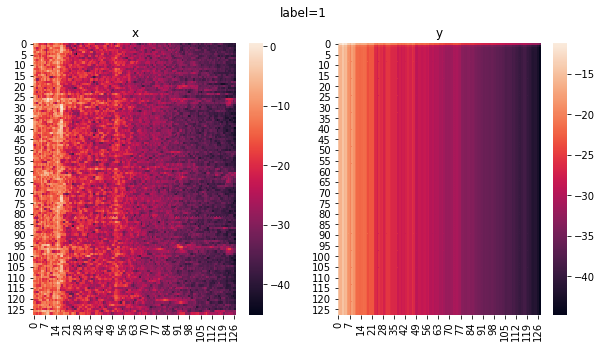

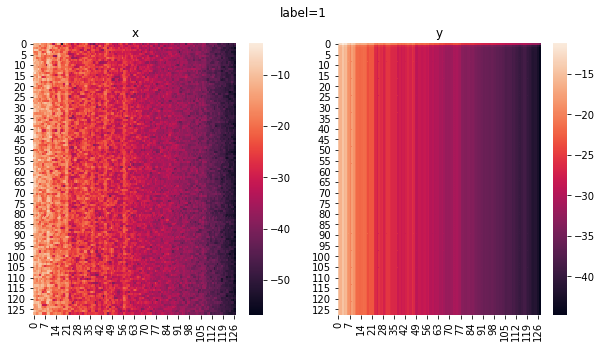

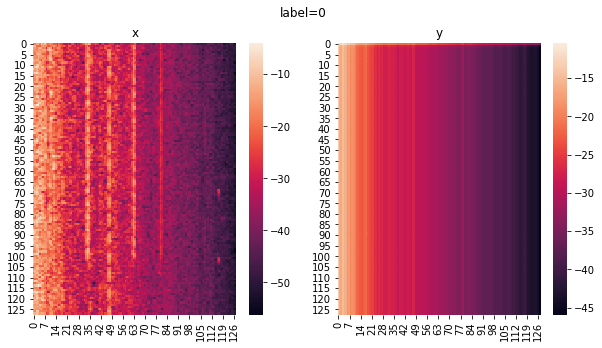

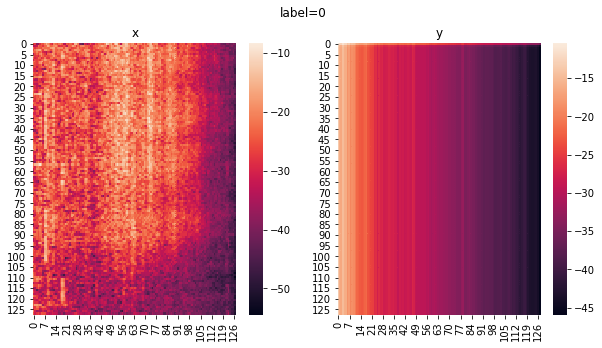

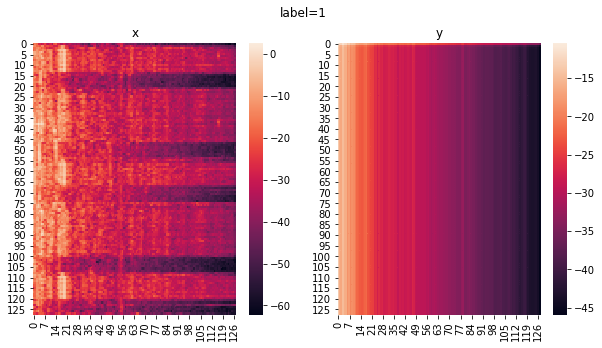

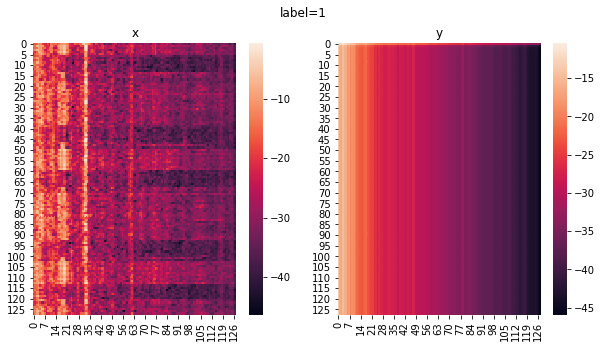

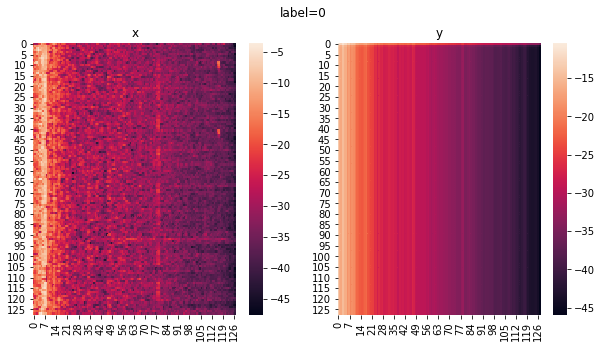

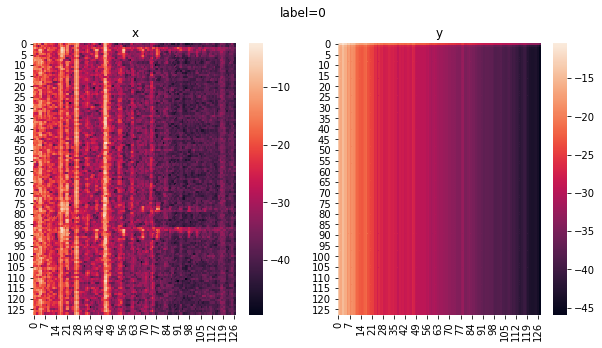

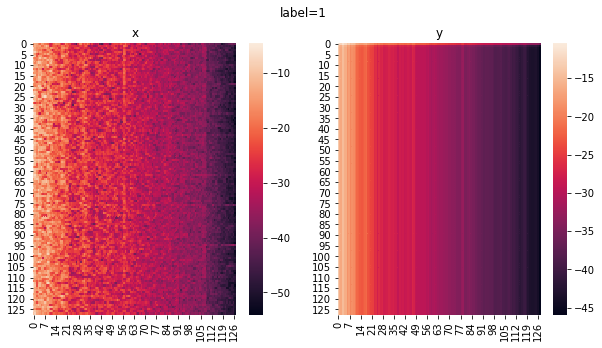

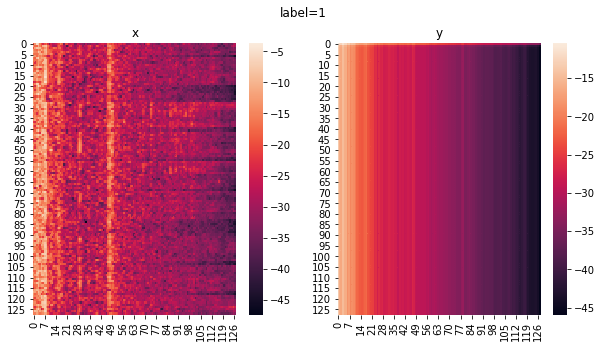

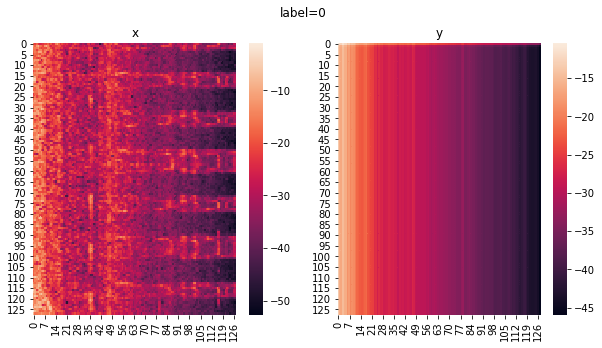

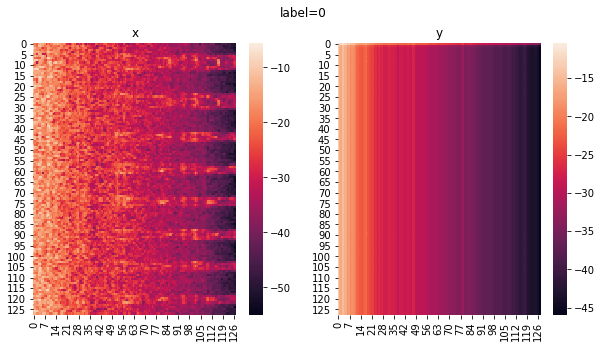

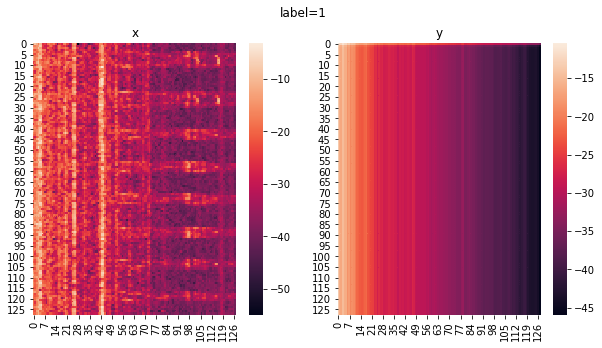

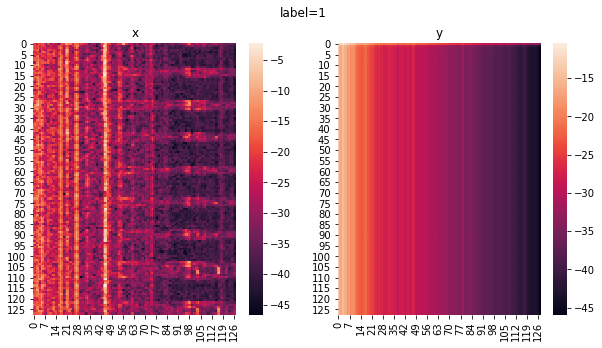

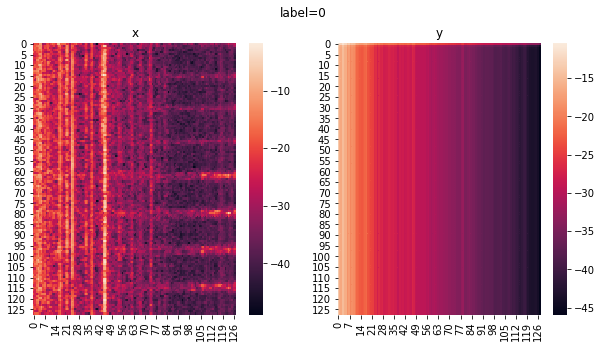

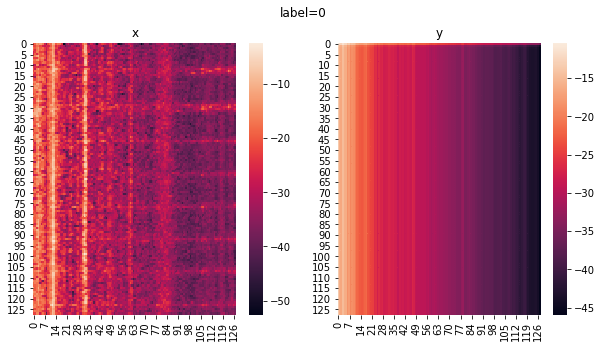

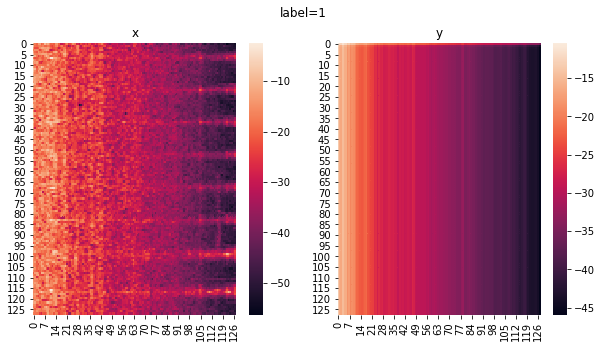

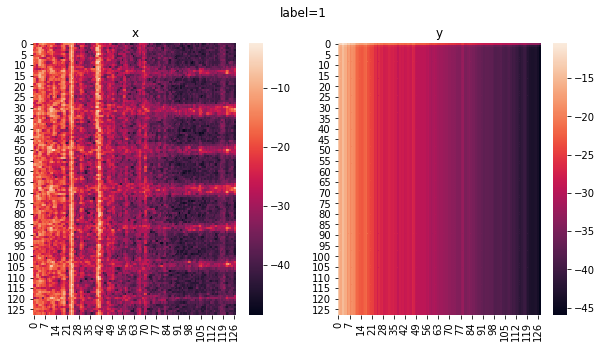

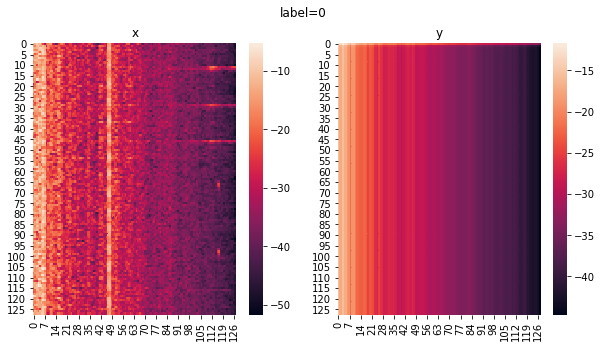

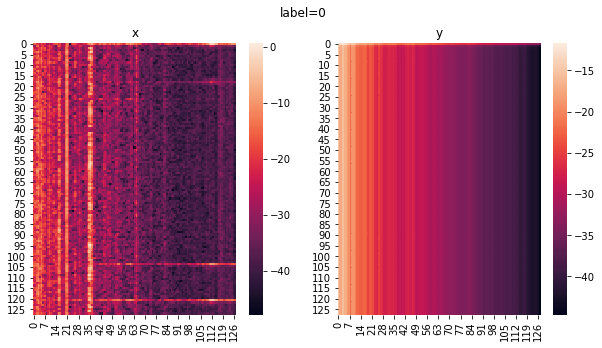

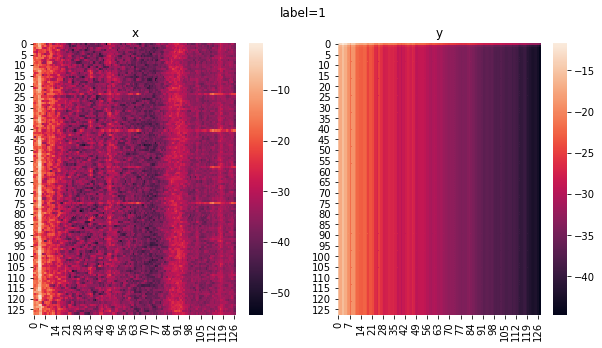

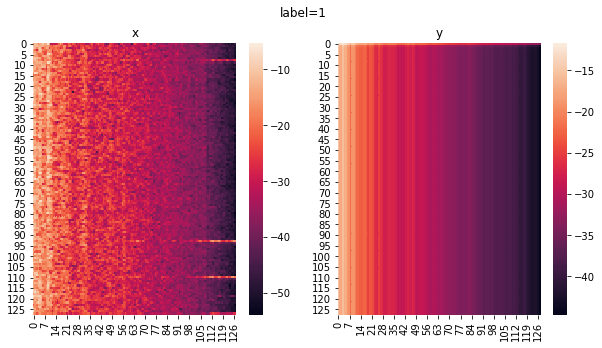

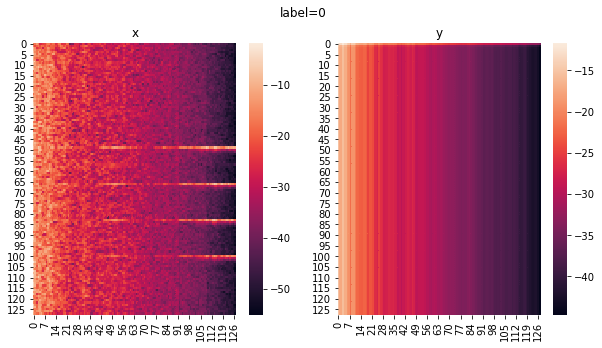

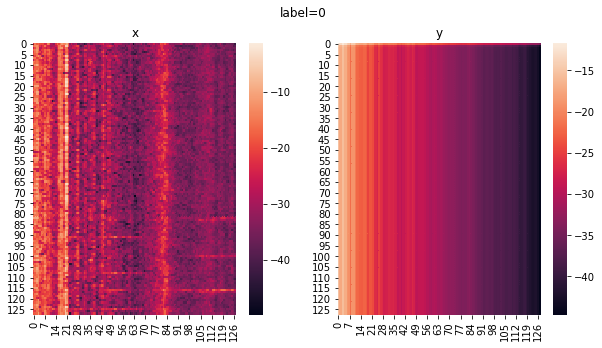

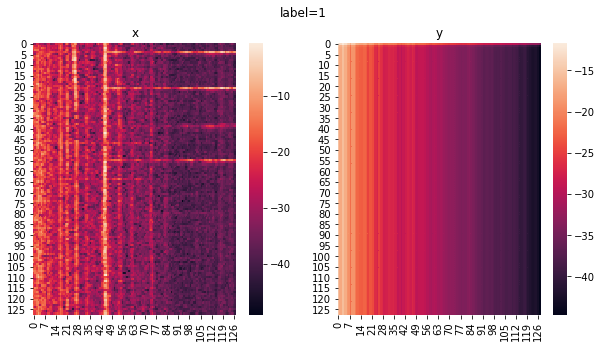

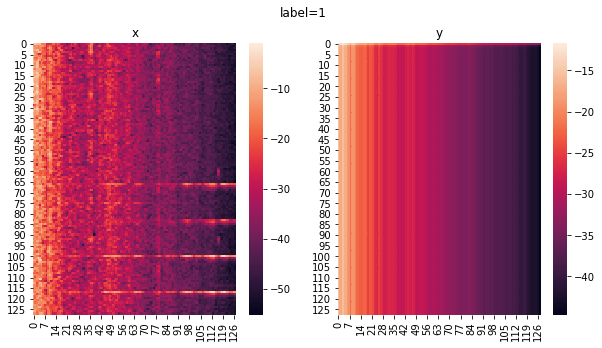

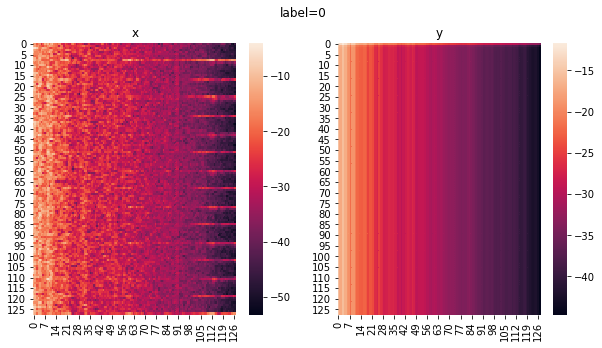

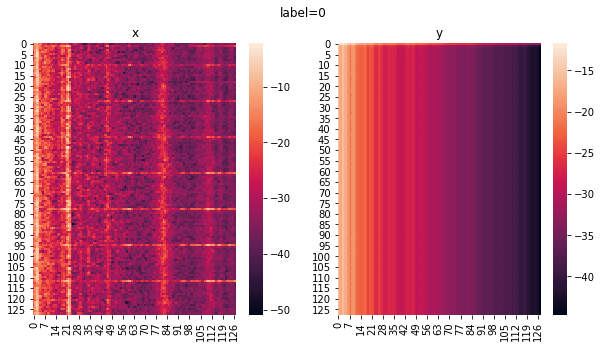

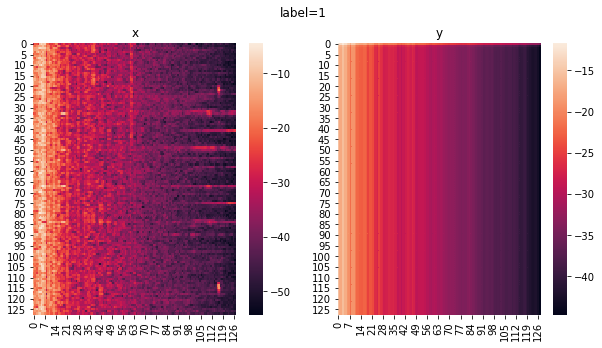

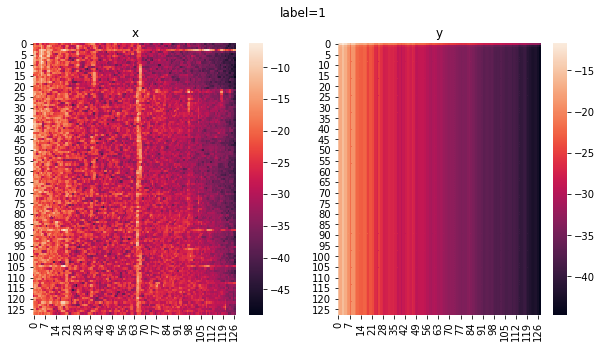

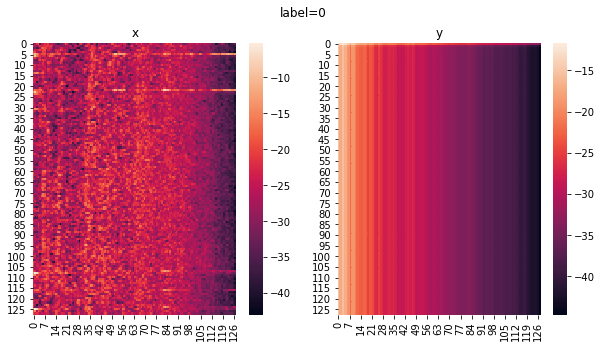

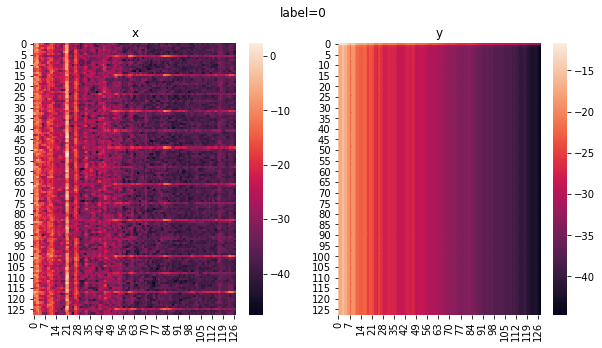

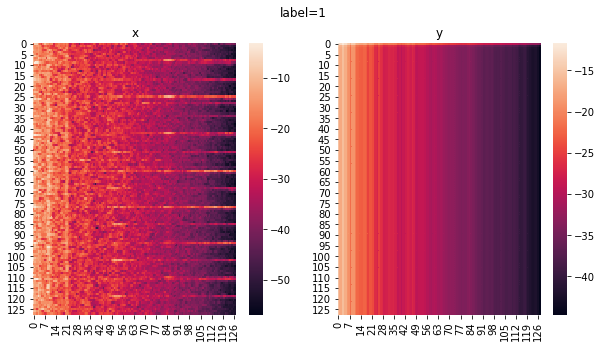

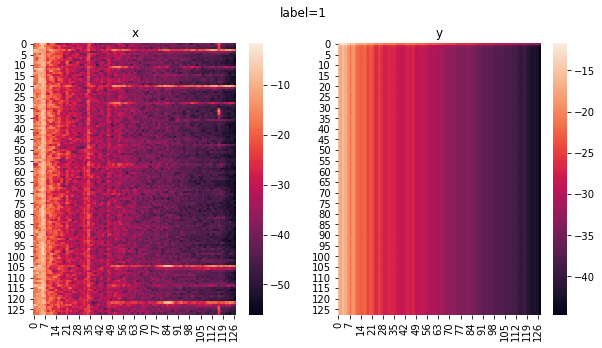

In [24]:
#def run_eval(param, mode):
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# make output result directory
os.makedirs(RESULT_DIR, exist_ok=True)

# load base directory
dirs = com.select_dirs(param=param, mode=mode)

# initialize lines in csv for AUC and pAUC
csv_lines = []


# loop of the base directory
for idx, target_dir in enumerate(dirs):
    com.logger.info("===========================")
    com.logger.info("[{idx}/{total}] {dirname}".format(
        dirname=target_dir, idx=idx+1, total=len(dirs)))

    machine_type = os.path.split(target_dir)[1]

    com.logger.info("============== MODEL LOAD ==============")

    model_file = "{model}/{machine_type}_model.pth".format(
        model=param["model_directory"],
        machine_type=machine_type)

    if not os.path.exists(model_file):
        com.logger.error("{} model not found ".format(machine_type))
        sys.exit(-1)

    # define AE model
    model = Model(sample_rate=config['preprocessing']['sample_rate'],
                  window_size=config['preprocessing']['window_size'],
                  hop_size=config['preprocessing']['hop_size'],
                  mel_bins=config['preprocessing']['mel_bins'],
                  fmin=config['preprocessing']['fmin'],
                  fmax=config['preprocessing']['fmax']).to(device)
    model.eval()
    model.load_state_dict(torch.load(model_file))

    if mode:
        # results by type
        csv_lines.append([machine_type])
        csv_lines.append(["id", "AUC", "pAUC"])
        performance = []

    machine_id_list = eval_func.get_machine_id_list_for_test(target_dir)
    recons_outpath = RECONS_OUTDIR + '/' + machine_type
    os.makedirs(recons_outpath, exist_ok=True)
    for id_str in machine_id_list:

        # load list of test files
        test_files, y_true = eval_func.test_file_list_generator(target_dir, id_str, mode)

        # setup anomaly score file path
        anomaly_score_csv = \
            "{result}/anomaly_score_{machine_type}_{id_str}.csv"\
            .format(result=param["result_directory"],
                    machine_type=machine_type,
                    id_str=id_str)
        anomaly_score_list = []

        com.logger.info(
            "============== BEGIN TEST FOR A MACHINE ID ==============")

        y_pred = [0. for k in test_files]
        anomaly_count = 0
        normal_count = 0
        for file_idx, file_path in enumerate(test_files):
            try:
                data = com.file_load(file_path)
                data = data[0]
                # reconstruction through auto encoder in pytorch
                input_data = torch.from_numpy(data).float().to(device)
                input_data = input_data.unsqueeze(0)
                with torch.no_grad():
                    output_dict = model(input_data)
                    pred = output_dict['loss'].to('cpu').detach().numpy().copy()
                    # make reconstruct_img
                    x = output_dict['x'].to('cpu')[0,:,:]
                    y = output_dict['y'].to('cpu')[0,:,:]
                    label = y_true[file_idx]
                    file_name = os.path.basename(file_path).replace('.wav', '')
                    file_name = recons_outpath + '/' + file_name
                    if int(label) == 1:
                        if anomaly_count == 1 or anomaly_count == 2:
                            make_reconstruct_img(x, y, label, file_name)
                        anomaly_count+=1
                    else:
                        if normal_count == 1 or normal_count == 2:
                            make_reconstruct_img(x, y, label, file_name)
                        normal_count+=1
                    
                y_pred[file_idx] = pred
                anomaly_score_list.append(
                    [os.path.basename(file_path), y_pred[file_idx]])
            except FileNotFoundError:
                com.logger.error("file broken!!: {}".format(file_path))

        # save anomaly score
        eval_func.save_csv(save_file_path=anomaly_score_csv,
                           save_data=anomaly_score_list)
        com.logger.info(
            "anomaly score result ->  {}".format(anomaly_score_csv))

        if mode:
            # append AUC and pAUC to lists
            auc = metrics.roc_auc_score(y_true, y_pred)
            p_auc = metrics.roc_auc_score(
                y_true, y_pred, max_fpr=config["etc"]["max_fpr"])
            csv_lines.append([id_str.split("_", 1)[1], auc, p_auc])
            performance.append([auc, p_auc])
            com.logger.info("AUC : {}".format(auc))
            com.logger.info("pAUC : {}".format(p_auc))

        com.logger.info(
            "============ END OF TEST FOR A MACHINE ID ============")

    if mode:
        # calculate averages for AUCs and pAUCs
        averaged_performance = numpy.mean(
            numpy.array(performance, dtype=float), axis=0)
        csv_lines.append(["Average"] + list(averaged_performance))
        csv_lines.append([])

if mode:
    # output results
    result_path = "{result}/{file_name}".format(
        result=param["result_directory"],
        file_name=param["result_file"])
    com.logger.info("AUC and pAUC results -> {}".format(result_path))
    eval_func.save_csv(save_file_path=result_path, save_data=csv_lines)